<a href="https://colab.research.google.com/github/vijaykumarharakuni/data_analysis/blob/main/Payment_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install faker --upgrade
# This makes sure you have the latest version of the Faker package
!pip install python-stdnum  # Install python-stdnum to support SWIFT/BIC codes generation


import random
from faker import Faker
import pandas as pd
from faker.providers import bank # Import the bank provider

# Initialize Faker with bank provider
fake = Faker()
fake.add_provider(bank) # Add the bank provider to enable 'swift_bic'


# Define additional fields and create synthetic data for thousands of rows
num_records = 5000  # Number of rows to generate
payment_data_large = []

# Define helper functions for randomization
def random_currency():
    return random.choice(["USD", "EUR", "GBP", "JPY", "INR"])

def random_charges_bearer():
    return random.choice(["OUR", "SHA", "BEN"])

def random_status():
    return random.choice(["Accepted", "Rejected", "Pending"])

def random_purpose():
    return random.choice(["Trade Settlement", "Salary Payment", "Invoice Payment", "FX Settlement", "Loan Repayment"])

# Generate data
for i in range(num_records):
    currency = random_currency()
    payment_data_large.append({
        "Message Type": random.choice(["PACS.008", "PACS.009"]),
        "Message ID": f"REF{100000 + i}",
        "Payment Amount (Currency)": f"{currency} {round(random.uniform(100, 100000), 2)}",
        "Execution Date": fake.date_this_year(),
        "Debtor Name": fake.name(),
        "Debtor Account Number": fake.bban(),
        "Creditor Name": fake.name(),
        "Creditor Account Number": fake.bban(),
        "Charges Bearer": random_charges_bearer(),
        "Sender's Charges": f"{currency} {round(random.uniform(0, 500), 2)}",
        "Intermediary Charges": f"{currency} {round(random.uniform(0, 200), 2)}",
        "Remittance Information": random_purpose(),
        "Status": random_status(),
        "Exchange Rate (if applicable)": round(random.uniform(0.5, 1.5), 4),
        "Purpose Code": random_purpose()
            })

# Convert the data to a DataFrame
df_large = pd.DataFrame(payment_data_large)

# Save the data to an Excel file
file_path_large = "/ISO20022_Large_Payment_Data.xlsx"
df_large.to_excel(file_path_large, index=False, sheet_name="Large Payment Data")

file_path_large
from faker import Faker

# Initialize Faker for realistic random data
fake = Faker()

# Define additional fields and create synthetic data for thousands of rows
num_records = 5000  # Number of rows to generate
payment_data_large = []

# Define helper functions for randomization
def random_currency():
    return random.choice(["USD", "EUR", "GBP", "JPY", "INR"])

def random_charges_bearer():
    return random.choice(["OUR", "SHA", "BEN"])

def random_status():
    return random.choice(["Accepted", "Rejected", "Pending"])

def random_purpose():
    return random.choice(["BONU","CASH", "SALA","CCRD","CORT","DCRD","DIVI","EPAY"])

def insturction_for_creditoragent():
    return random.choice(["CHQB","CORT","HOLD","PHOB","PRTK","RECI","TELB","TKCM","TKSG","TKSP","TKVE","TKXP","TOKN","VLTK","SEID"])

def random_address():
    return fake.address()

def creditor_bic():
    return random.choice(['DEUTDEFF', 'BNPAFRPP', 'CITIUS33', 'HSBCGB2L', 'CHASUS33', 'BARCGB22', 'BOFAUS3N', 'NDEAFIHH', 'INGBNL2A', 'UBSWCHZH80A', 'DBSSSGSG', 'ANZBAU3M', 'MIZBJPJT', 'BKCHCNBJ', 'ICBKCNBJ', 'HSBCHKHH', 'BBVAESMM', 'BNLIITRR', 'NATXFRPP', 'RABONL2U'])

def debtor_bic():
    return random.choice(['ABNANL2A', 'BKTRUS33', 'BSCHESMM', 'DABADKKK', 'BKAUATWW', 'DRESDEFF', 'FTSBUS44', 'GEBABEBB', 'HLFXGB21', 'KREDBEBB', 'LOYDGB2L', 'MIDLGB22', 'NWBKGB2L', 'RBOSGB2L', 'SCBLGB2L', 'SGSSFRPP', 'SMBCJPJT', 'UBSWCHZH80A', 'WFBIUS6S', 'ZKBKCHZZ80A'])

# Generate data
for i in range(num_records):
    currency = random_currency()
    payment_data_large.append({
        "Message Type": random.choice(["PACS.008", "PACS.009"]),
        "Message ID": f"REF{100000 + i}",
        "Payment Amount (Currency)": f"{currency} {round(random.uniform(100, 100000), 2)}",
        "Execution Date": fake.date_this_year(),
        "Intermediary Name": fake.company(),
        "Debtor Name": fake.name(),
        "Debtor Account Number": fake.bban(),
        "Creditor Name": fake.name(),
        "Creditor Account Number": fake.bban(),
        "Charges Bearer": random_charges_bearer(),
        "Sender's Charges": f"{currency} {round(random.uniform(0, 500), 2)}",
        "Intermediary Charges": f"{currency} {round(random.uniform(0, 200), 2)}",
        "Remittance Information": random_purpose(),
        "Status": random_status(),
        "Exchange Rate (if applicable)": round(random.uniform(0.5, 1.5), 4),
        "Purpose Code": random_purpose(),
        "Instruction for Creditor Agent": insturction_for_creditoragent(),
        "Creditor Address":random_address(),
        "Debtor Address":random_address(),
        "Creditor BIC":creditor_bic(),
        "Debtor BIC":debtor_bic()

    })

# Convert the data to a DataFrame
df_large = pd.DataFrame(payment_data_large)

# Save the data to an Excel file
file_path_large = "/content/ISO20022_Large_Payment_Data (2).xlsx"
df_large.to_excel(file_path_large, index=False, sheet_name="Large Payment Data")

file_path_large



'/content/ISO20022_Large_Payment_Data (2).xlsx'

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('/content/ISO20022_Large_Payment_Data_Latest.xlsx')
data.head()

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   object        
 1   Message ID                      5000 non-null   object        
 2   Payment Amount (Currency)       5000 non-null   object        
 3   Execution Date                  5000 non-null   datetime64[ns]
 4   Intermediary Name               5000 non-null   object        
 5   Debtor Name                     5000 non-null   object        
 6   Debtor Account Number           5000 non-null   object        
 7   Creditor Name                   5000 non-null   object        
 8   Creditor Account Number         5000 non-null   object        
 9   Charges Bearer                  5000 non-null   object        
 10  Sender's Charges                5000 non-null   object        
 11  Inte

In [42]:
data.head()

,Message Type,Message ID,Payment Amount (Currency),Execution Date,Intermediary Name,Debtor Name,Debtor Account Number,Creditor Name,Creditor Account Number,Charges Bearer,...,Intermediary Charges,Remittance Information,Status,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor Address,Debtor Address,Creditor BIC,Debtor BIC
0,PACS.008,REF100000,EUR 19368.73,2025-01-03,Ball Inc,Victoria Lewis,PUPC81480687430802,Amy Daniels,BYZK78819053587504,BEN,...,EUR 20.42,CCRD,Rejected,0.9547,CCRD,TOKN,"60618 Timothy Island\nSouth Rebecca, FM 52393","9714 Hayes Throughway\nPatriciafurt, GA 62942",UBSWCHZH80A,WFBIUS6S
1,PACS.008,REF100001,USD 62508.36,2025-01-14,Hardy-Jones,Jorge Green,EMSZ86980142512720,Katherine Taylor,KIXK34220804425082,OUR,...,USD 134.56,DIVI,Rejected,0.5580,CCRD,TKSG,"671 Christopher Shoals Apt. 114\nSouth David, ...","073 Parker Mountains Apt. 049\nWest Edward, WA...",MIZBJPJT,DRESDEFF
2,PACS.009,REF100002,USD 34418.85,2025-01-25,Williamson Group,Kimberly Rivera,YJPG49156434557820,Anthony Gardner,PTVZ62668729808443,BEN,...,USD 72.85,SALA,Pending,0.9752,CCRD,VLTK,"80427 Angela Square\nDeantown, IL 24769","949 Mills Fields\nWest Steve, NY 57570",BKCHCNBJ,HLFXGB21
3,PACS.009,REF100003,GBP 9898.03,2025-01-02,Willis-Carey,Abigail Johnson,OJYL33392255840699,Christy Reese,TMAG38660992274225,SHA,...,GBP 197.92,CORT,Rejected,1.1252,CASH,RECI,"490 Martin Pine Suite 632\nWaynemouth, PR 22514","54353 Erin Station Suite 854\nJosephfurt, SD 8...",DBSSSGSG,HLFXGB21
4,PACS.009,REF100004,INR 47985.16,2025-01-27,Silva LLC,Patricia Henry,FSWL06568032089283,Jennifer Martinez,SRTF89329335706297,OUR,...,INR 139.25,DCRD,Pending,1.1432,CCRD,TOKN,"7755 Rodney Motorway\nDonnaborough, ND 07492","8253 Paul Court\nNew Danielle, TN 47571",DEUTDEFF,MIDLGB22


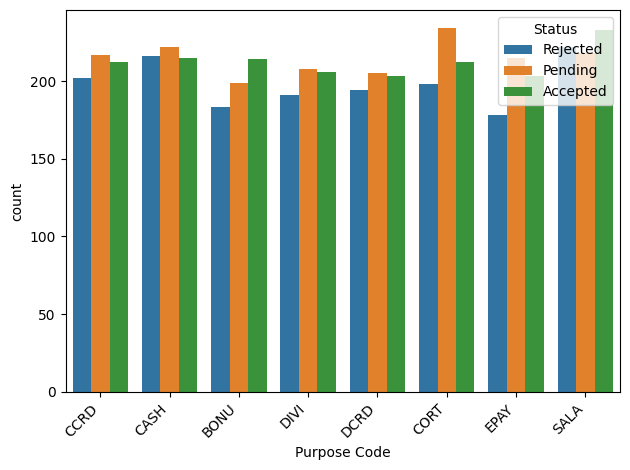

In [15]:
sns.countplot(data=data, x='Purpose Code', hue='Status')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [47]:
data[['Debtor Address', 'Debtor CountyPost Code']] = data["Debtor Address"].str.split('\n', expand=True)
data[['Debtor County', 'Debtor CountyPost Code']] = data["Debtor CountyPost Code"].str.split(',', expand=True)
data['Debtor State']= data["Debtor CountyPost Code"].str[0:3]
data[['Creditor Address', 'Creditor CountyPost Code']] = data["Creditor Address"].str.split('\n', expand=True)
data[['Creditor County', 'Creditor CountyPost Code']] = data["Creditor CountyPost Code"].str.split(',', expand=True)
data['Creditor State']= data["Creditor CountyPost Code"].str[0:3]
data.drop(['Debtor CountyPost Code'],axis=1,inplace=True)
data.drop(['Creditor CountyPost Code'],axis=1,inplace=True)
data.head()





,Message Type,Message ID,Payment Amount (Currency),Execution Date,Intermediary Name,Debtor Name,Debtor Account Number,Creditor Name,Creditor Account Number,Charges Bearer,...,Purpose Code,Instruction for Creditor Agent,Creditor Address,Debtor Address,Creditor BIC,Debtor BIC,Debtor County,Debtor State,Creditor County,Creditor State
0,PACS.008,REF100000,EUR 19368.73,2025-01-03,Ball Inc,Victoria Lewis,PUPC81480687430802,Amy Daniels,BYZK78819053587504,BEN,...,CCRD,TOKN,60618 Timothy Island,9714 Hayes Throughway,UBSWCHZH80A,WFBIUS6S,Patriciafurt,GA,South Rebecca,FM
1,PACS.008,REF100001,USD 62508.36,2025-01-14,Hardy-Jones,Jorge Green,EMSZ86980142512720,Katherine Taylor,KIXK34220804425082,OUR,...,CCRD,TKSG,671 Christopher Shoals Apt. 114,073 Parker Mountains Apt. 049,MIZBJPJT,DRESDEFF,West Edward,WA,South David,GA
2,PACS.009,REF100002,USD 34418.85,2025-01-25,Williamson Group,Kimberly Rivera,YJPG49156434557820,Anthony Gardner,PTVZ62668729808443,BEN,...,CCRD,VLTK,80427 Angela Square,949 Mills Fields,BKCHCNBJ,HLFXGB21,West Steve,NY,Deantown,IL
3,PACS.009,REF100003,GBP 9898.03,2025-01-02,Willis-Carey,Abigail Johnson,OJYL33392255840699,Christy Reese,TMAG38660992274225,SHA,...,CASH,RECI,490 Martin Pine Suite 632,54353 Erin Station Suite 854,DBSSSGSG,HLFXGB21,Josephfurt,SD,Waynemouth,PR
4,PACS.009,REF100004,INR 47985.16,2025-01-27,Silva LLC,Patricia Henry,FSWL06568032089283,Jennifer Martinez,SRTF89329335706297,OUR,...,CCRD,TOKN,7755 Rodney Motorway,8253 Paul Court,DEUTDEFF,MIDLGB22,New Danielle,TN,Donnaborough,ND


In [20]:
data.head()

,Message Type,Message ID,Payment Amount (Currency),Execution Date,Intermediary Name,Debtor Name,Debtor Account Number,Creditor Name,Creditor Account Number,Charges Bearer,...,Status,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor Address,Debtor Address,Creditor BIC,Debtor BIC,Creditor Address Line 1,Creditor CountyPost Code
0,PACS.008,REF100000,EUR 19368.73,2025-01-03,Ball Inc,Victoria Lewis,PUPC81480687430802,Amy Daniels,BYZK78819053587504,BEN,...,Rejected,0.9547,CCRD,TOKN,60618 Timothy Island,"9714 Hayes Throughway\nPatriciafurt, GA 62942",UBSWCHZH80A,WFBIUS6S,60618 Timothy Island,"South Rebecca, FM 52393"
1,PACS.008,REF100001,USD 62508.36,2025-01-14,Hardy-Jones,Jorge Green,EMSZ86980142512720,Katherine Taylor,KIXK34220804425082,OUR,...,Rejected,0.5580,CCRD,TKSG,671 Christopher Shoals Apt. 114,"073 Parker Mountains Apt. 049\nWest Edward, WA...",MIZBJPJT,DRESDEFF,671 Christopher Shoals Apt. 114,"South David, GA 42733"
2,PACS.009,REF100002,USD 34418.85,2025-01-25,Williamson Group,Kimberly Rivera,YJPG49156434557820,Anthony Gardner,PTVZ62668729808443,BEN,...,Pending,0.9752,CCRD,VLTK,80427 Angela Square,"949 Mills Fields\nWest Steve, NY 57570",BKCHCNBJ,HLFXGB21,80427 Angela Square,"Deantown, IL 24769"
3,PACS.009,REF100003,GBP 9898.03,2025-01-02,Willis-Carey,Abigail Johnson,OJYL33392255840699,Christy Reese,TMAG38660992274225,SHA,...,Rejected,1.1252,CASH,RECI,490 Martin Pine Suite 632,"54353 Erin Station Suite 854\nJosephfurt, SD 8...",DBSSSGSG,HLFXGB21,490 Martin Pine Suite 632,"Waynemouth, PR 22514"
4,PACS.009,REF100004,INR 47985.16,2025-01-27,Silva LLC,Patricia Henry,FSWL06568032089283,Jennifer Martinez,SRTF89329335706297,OUR,...,Pending,1.1432,CCRD,TOKN,7755 Rodney Motorway,"8253 Paul Court\nNew Danielle, TN 47571",DEUTDEFF,MIDLGB22,7755 Rodney Motorway,"Donnaborough, ND 07492"


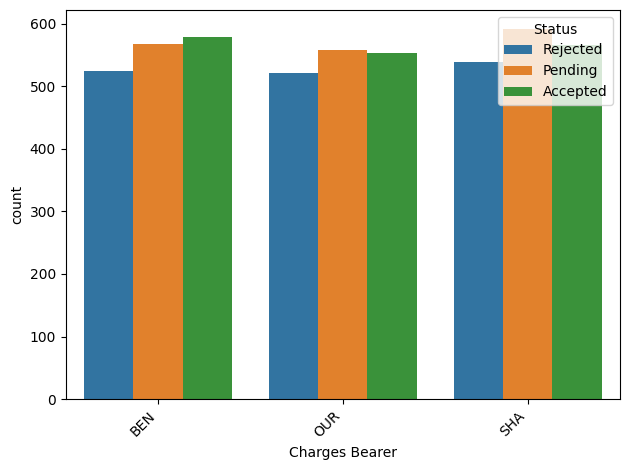

In [48]:
sns.countplot(data=data, x='Charges Bearer', hue='Status')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [50]:


data[['Payment_Currency', 'Payment_Amount']] = data['Payment Amount (Currency)'].str.split(' ', expand=True)

data[['Sender_Charge_Currency', 'Sender_Charge_Amount']] = data["Sender's Charges"].str.split(' ', expand=True)

data[['Intermediary_Charge_Currency', 'Intermediary_Charge_Amount']] = data["Intermediary Charges"].str.split(' ', expand=True)


data.info()

data.drop(["Sender's Charges"],axis=1,inplace=True)
data.drop(['Payment Amount (Currency)'],axis=1,inplace=True)
data.drop(['Intermediary Charges'],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   object        
 1   Message ID                      5000 non-null   object        
 2   Payment Amount (Currency)       5000 non-null   object        
 3   Execution Date                  5000 non-null   datetime64[ns]
 4   Intermediary Name               5000 non-null   object        
 5   Debtor Name                     5000 non-null   object        
 6   Debtor Account Number           5000 non-null   object        
 7   Creditor Name                   5000 non-null   object        
 8   Creditor Account Number         5000 non-null   object        
 9   Charges Bearer                  5000 non-null   object        
 10  Sender's Charges                5000 non-null   object        
 11  Inte

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   object        
 1   Message ID                      5000 non-null   object        
 2   Execution Date                  5000 non-null   datetime64[ns]
 3   Intermediary Name               5000 non-null   object        
 4   Debtor Name                     5000 non-null   object        
 5   Debtor Account Number           5000 non-null   object        
 6   Creditor Name                   5000 non-null   object        
 7   Creditor Account Number         5000 non-null   object        
 8   Charges Bearer                  5000 non-null   object        
 9   Remittance Information          5000 non-null   object        
 10  Status                          5000 non-null   object        
 11  Exch

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Message Type                   5000 non-null   object        
 1   Message ID                     5000 non-null   object        
 2   Execution Date                 5000 non-null   datetime64[ns]
 3   Debtor Name                    5000 non-null   object        
 4   Debtor Account Number          5000 non-null   object        
 5   Creditor Name                  5000 non-null   object        
 6   Creditor Account Number        5000 non-null   object        
 7   Charges Bearer                 5000 non-null   object        
 8   Remittance Information         5000 non-null   object        
 9   Status                         5000 non-null   object        
 10  Exchange Rate (if applicable)  5000 non-null   float64       
 11  Purpose Code     

In [52]:
data.groupby('Charges Bearer').value_counts()


Charges Bearer  Message Type  Message ID  Execution Date  Intermediary Name               Debtor Name      Debtor Account Number  Creditor Name      Creditor Account Number  Remittance Information  Status    Exchange Rate (if applicable)  Purpose Code  Instruction for Creditor Agent  Creditor Address             Debtor Address                  Creditor BIC  Debtor BIC   Debtor County      Debtor State  Creditor County     Creditor State  Payment_Currency  Payment_Amount  Sender_Charge_Currency  Sender_Charge_Amount  Intermediary_Charge_Currency  Intermediary_Charge_Amount
BEN             PACS.008      REF100000   2025-01-03      Ball Inc                        Victoria Lewis   PUPC81480687430802     Amy Daniels        BYZK78819053587504       CCRD                    Rejected  0.9547                         CCRD          TOKN                            60618 Timothy Island         9714 Hayes Throughway           UBSWCHZH80A   WFBIUS6S     Patriciafurt       GA            South Rebecca       FM              EUR               19368.73        EUR                     183.98                EUR                           20.42                         1
                              REF100005   2025-01-01      Carr, Sullivan and Jordan       Connie Castro    FCQM92857213353031     Alicia Dunlap      WHLZ41758001271125       CCRD                    Accepted  0.9044                         BONU          TELB                            31784 Jorge Island           55814 Mcguire Mall              BARCGB22      MIDLGB22     South Markmouth    NJ            East Benjaminmouth  SC              INR               58411.65        INR                     196.12                INR                           125.25                        1
                              REF100025   2025-01-12      Smith, Adams and Erickson       Alec Fields      GHBS96545382651717     Kayla Garcia       EPCH49870437984041       EPAY                    Rejected  0.7654                         CORT          CORT                            545 Cross Mills              271 Calvin Trace                DEUTDEFF      GEBABEBB     Ericahaven         VT            West Paul           RI              EUR               65779.61        EUR                     105.56                EUR                           40.9                          1
                              REF100033   2025-01-15      Brandt PLC                      Robert Buckley   RXFJ29991333002278     Kristopher Taylor  DCRA92658517648172       CCRD                    Pending   0.7177                         CASH          HOLD                            4624 Silva Walk              4636 Jones Crescent             CHASUS33      SCBLGB2L     South Bradley      VA            Garciachester       NV              EUR               14853.22        EUR                     314.55                EUR                           143.18                        1
                              REF100052   2025-01-12      Harrell Inc                     Sandra Hughes    AIMV04430248175433     Laurie Martinez    QMNP30212093970055       CORT                    Accepted  1.2707                         BONU          TOKN                            677 Lee Estates              1018 Murray Fords               BOFAUS3N      DRESDEFF     Dayborough         ID            Carolynmouth        RI              GBP               17455.43        GBP                     278.58                GBP                           12.93                         1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [94]:
data.value_counts().groupby('Purpose Code').count()
data.value_counts().groupby('Instruction for Creditor Agent').count()
data.value_counts().groupby('Remittance Information').count()

,count
Remittance Information,
BONU,518
CASH,546
CCRD,474
CORT,474
DCRD,468
DIVI,518
EPAY,496
SALA,486


In [101]:
data.groupby(['Creditor BIC','Creditor State']).Payment_Amount.max()
data.groupby(['Creditor BIC','Creditor State']).Payment_Amount.min()
data.groupby(['Creditor BIC','Creditor State']).Payment_Amount.count().sort_values(ascending=False)
data_plt=data.groupby(['Creditor BIC','Creditor State','Purpose Code']).Payment_Amount.max().sort_values(ascending=False)
data.groupby(['Creditor BIC','Creditor State']).Payment_Amount.count().sort_values(ascending=False)
#data_plt

import matplotlib.pyplot as plt

# Assuming data_plt is already calculated as in your provided code

# Convert data_plt to a DataFrame for easier plotting
#data_plt_df = data_plt.reset_index()

# Create the plot
#plt.figure(figsize=(12, 6))  # Adjust figure size as needed
#plt.bar(data_plt_df['Creditor BIC'] + ', ' + data_plt_df['Creditor State'] + ', ' + data_plt_df['Purpose Code'], data_plt_df['Payment_Amount'])
#plt.xlabel('Creditor BIC, Creditor State, Purpose Code')
#plt.ylabel('Maximum Payment Amount')
#plt.title('Maximum Payment Amount by Creditor, State, and Purpose')
#plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
#plt.tight_layout()
#plt.show()
#

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'WFBIUS6S'),
  Text(1, 0, 'DRESDEFF'),
  Text(2, 0, 'HLFXGB21'),
  Text(3, 0, 'MIDLGB22'),
  Text(4, 0, 'RBOSGB2L'),
  Text(5, 0, 'UBSWCHZH80A'),
  Text(6, 0, 'SCBLGB2L'),
  Text(7, 0, 'BKAUATWW'),
  Text(8, 0, 'ABNANL2A'),
  Text(9, 0, 'NWBKGB2L'),
  Text(10, 0, 'KREDBEBB'),
  Text(11, 0, 'DABADKKK'),
  Text(12, 0, 'FTSBUS44'),
  Text(13, 0, 'ZKBKCHZZ80A'),
  Text(14, 0, 'BSCHESMM'),
  Text(15, 0, 'GEBABEBB'),
  Text(16, 0, 'SGSSFRPP'),
  Text(17, 0, 'BKTRUS33'),
  Text(18, 0, 'LOYDGB2L'),
  Text(19, 0, 'SMBCJPJT')])

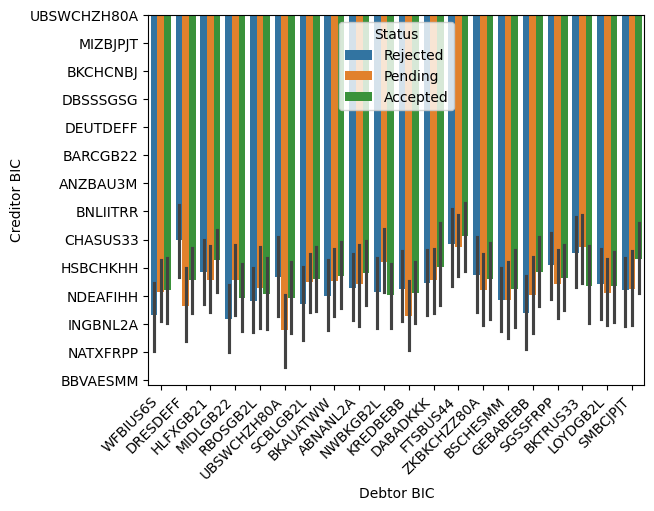

In [114]:
sns.barplot(data=data, x='Debtor BIC', y='Creditor BIC', hue='Status')
plt.xticks(rotation=45, ha='right')

In [54]:
data.value_counts().groupby('Purpose Code').count()

,count
Purpose Code,
BONU,454
CASH,503
CCRD,494
CORT,510
DCRD,487
DIVI,498
EPAY,489
SALA,545


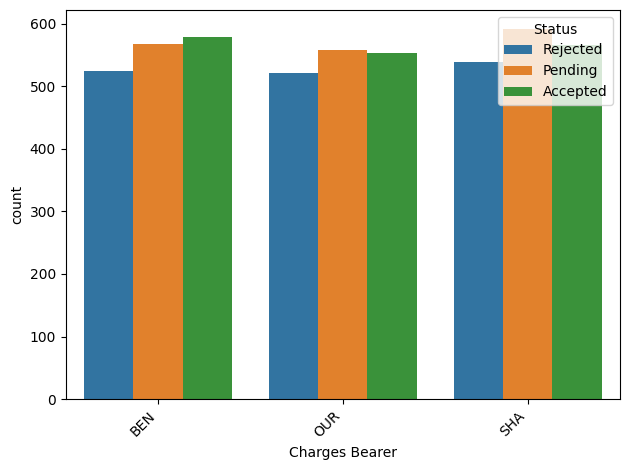

In [55]:
sns.countplot(data=data, x='Charges Bearer', hue='Status')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

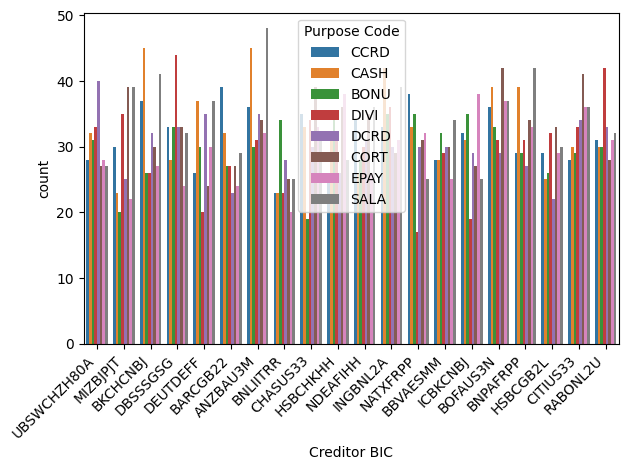

In [87]:
sns.countplot(data=data, x='Creditor BIC', hue='Purpose Code')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [107]:
#sns.countplot(data=data, x='Creditor BIC', hue='Creditor State')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
#plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
#plt.tight_layout() # Adjust layout to prevent labels from overlapping
#plt.show()

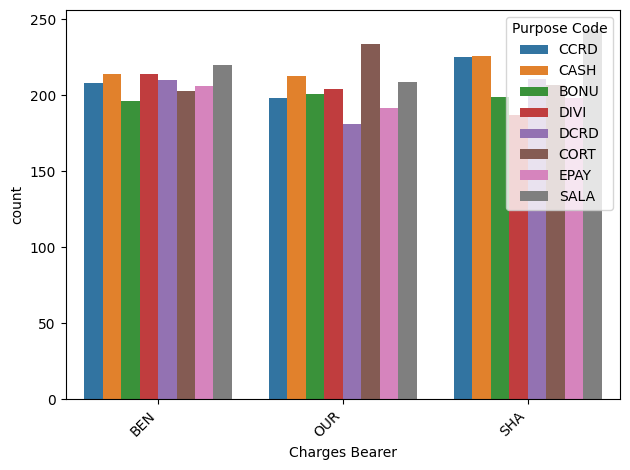

In [102]:
sns.countplot(data=data, x='Charges Bearer', hue='Purpose Code')
#  'Status' is used as the hue, you can change it to other columns
# like 'Charges Bearer', 'Message Type' etc.
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [57]:
#Data shows Remittance Information with Payment Amount
data.groupby(['Remittance Information']).Payment_Amount.min()


#data.groupby(['Remittance Information']).Payment_Amount.min().sort_values(ascending=False)
#data.groupby(['Remittance Information']).Payment_Amount.sum().sort_values(ascending=True)

,Payment_Amount
Remittance Information,
BONU,10054.11
CASH,10194.7
CCRD,1011.61
CORT,10024.04
DCRD,11105.89
DIVI,10075.94
EPAY,10039.41
SALA,10238.55


<Axes: xlabel='Remittance Information,Charges Bearer'>

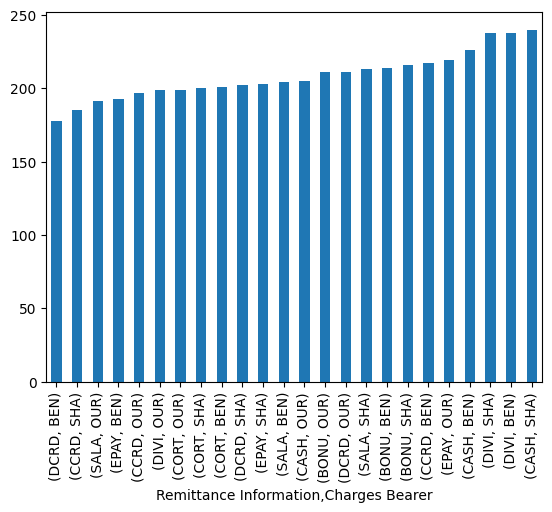

In [58]:
#data.groupby(['Remittance Information']).Payment_Amount.min().sort_values(ascending=False)

data.groupby(['Remittance Information','Charges Bearer']).Payment_Currency.count().sort_values(ascending=True)
data.groupby(['Remittance Information','Charges Bearer']).Payment_Currency.count().sort_values(ascending=True).plot(kind='bar')

In [59]:

data.groupby(['Execution Date','Charges Bearer']).Payment_Currency.count().sort_values(ascending=True)

,,Payment_Currency
Execution Date,Charges Bearer,
2025-01-14,BEN,42
2025-01-24,OUR,42
2025-01-01,OUR,45
2025-01-04,SHA,46
2025-01-20,OUR,48
...,...,...
2025-01-18,SHA,71
2025-01-09,OUR,71
2025-01-13,BEN,72


In [106]:

data.groupby(['Remittance Information','Execution Date']).Payment_Currency.count().sort_values(ascending=True)


Remittance Information  Execution Date
CCRD                    2025-01-26        10
DCRD                    2025-01-12        12
                        2025-01-09        14
                        2025-01-11        14
EPAY                    2025-01-08        14
                                          ..
CASH                    2025-01-13        34
DIVI                    2025-01-02        35
CASH                    2025-01-21        35
DIVI                    2025-01-18        36
                        2025-01-27        38
Name: Payment_Currency, Length: 224, dtype: int64

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


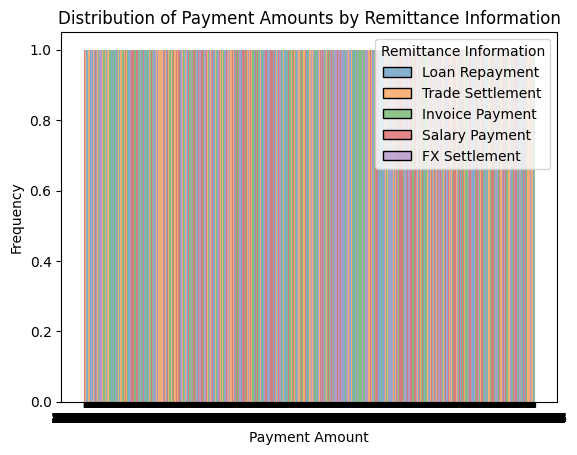

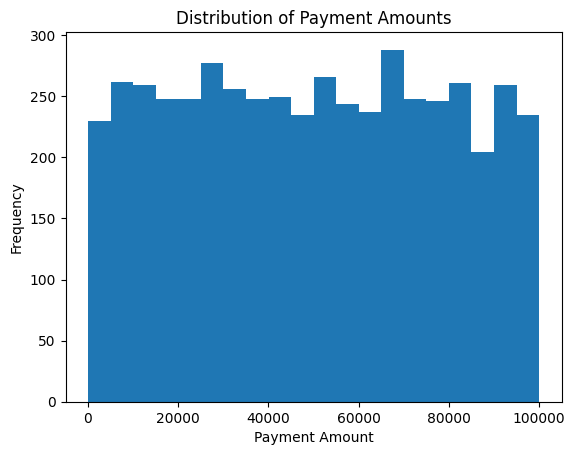

In [105]:
import matplotlib.pyplot as plt

# Convert 'Payment_Amount' to numeric
data['Payment_Amount'] = pd.to_numeric(data['Payment_Amount'])

# Create a histogram
plt.hist(data['Payment_Amount'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Payment Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Amounts')
plt.show()